In [1]:
from matplotlib import pyplot as plt, numpy as np, rc
from PIL import Image, ImageOps
import os

In [2]:
font = {'family': 'Verdana',
       'weight': 'normal'}
rc('font', **font)

path = "C:\Users\user\Desktop\measure"
files = os.listdir(path)
files = filter(lambda x: x.endswith('.bmp'), files)

for k in files:
    img = Image.open(path + '\\' + k)
    width = img.size[0]
    height = img.size[1]
    pix = img.load()
    
    for i in range(width):
        for j in range(height):
            a = pix[i, j][0]
            b = pix[i, j][1]
            c = pix[i, j][2]
            S = (a + b + c) // 3
            img.putpixel((i, j), (S, S, S))
     
    pix = img.load()
    
    d = []
    for i in range(width):
        d.append(pix[i, 366][0])
        
    x = range(width)[::]
    y = d[::]

In [3]:
k = 50
newy = np.mean(zip(*[iter(y)]*k), 1)
newx = x[::k]
if len(newx) > len(newy):
    newx.pop()
if len(newx) < len(newy):
    newy.pop()
print len(newx), len(newy)

18 18


In [4]:
def lagranz(x, y, t):
    z = 0
    for j in range(len(y)):
        p1=1; p2=1
        for i in range(len(x)):
            if i==j:
                p1 = p1*1; p2 = p2*1
            else:
                p1=p1*(t-x[i])
                p2=p2*(x[j]-x[i])
        z=z+y[j]*p1/p2
    return z
    
x_lgz=np.linspace(np.min(newx), np.max(newx), 110)
y_lgz=[lagranz(newx, newy, i) for i in x_lgz]

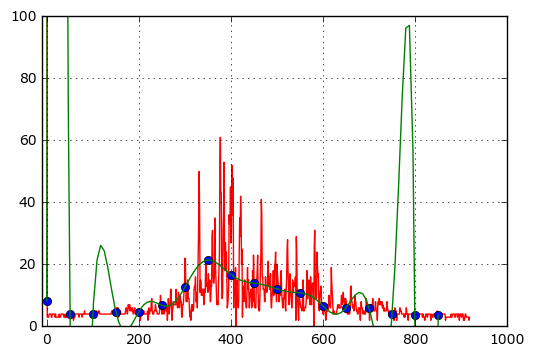

In [5]:
plt.plot(x, y, color='red')
plt.plot(newx, newy,'o', color='blue')
plt.plot(x_lgz, y_lgz, color='green')
plt.grid(True)
plt.axis([-10, 1000, 0, 100])
plt.show()
plt.clf()